## 5.1. linear SVM classifier

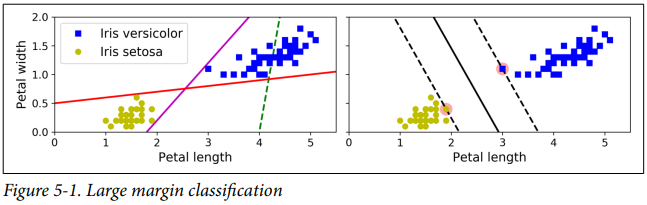

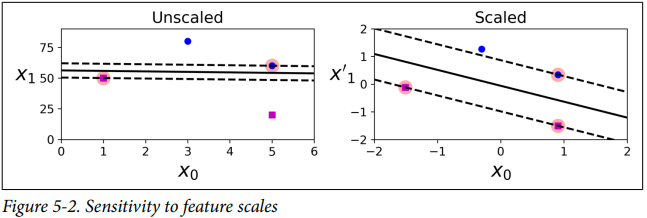

* F1에서 볼수 있듯이 support vector란 두개의 class를 양분해주는 boundary에서, 평행하게 line을 그었을 때 가장 인접한 datapoint를 뜻한다.
* 그러나 이는 F2에서 살필 수 있듯이 feature scale에 민감하기 때문에 우측그림과 같이 StandardScaler를 통해 조정할 경우 boundary가 잘 형성된다.

### 5.1.1. Soft Margin Classification

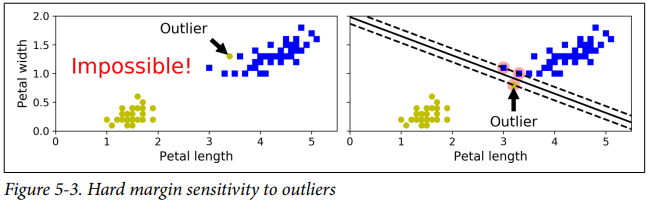

* F3의 좌측그림과 같이 outlier가 존재하는 경우 Hard Margin을 활용한 Classification은 불가능하다.
* 따라서 우측그림과 같이 outlier가 존재하더라도 이를 용인하되, penalty를 부여하는 Soft Margin이 선호된다.


* penalty에 대한 강도를 조절하는 hyperparameter C는 높으면 높을수록 더욱 overfitting되는 경향이 있기에 적당히 조절해준다.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # 꽃잎길이, 꽃잎너비
y = (iris['target']==2).astype(float)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

* 이경우 LinearSVC 대신 SVC(kernel='linear', C=1) 내지는 SGDClassifier(loss='hinge', alpha=1/(m*C))로 대체할 수 있다.
* LinearSVC는 bias 또한 규제하기 때문에 평균을 뺀 값을 사용해야하는데, 이는 StandardScaler로 해결된다. 또한 feature 대비 instance가 많다면 성능을 높이기 위해 dual parameter를 False로 설정하는것이 좋다.

## 5.2. non-linear SVM Classifier

### 5.2.1. Polynomial Kernel

* feature variables를 추가하는 것은 간단하지만, 저차항은 underfitting, 고차항은 overfitting의 문제가 발생한다. 
* 따라서 Kernel trick을 활용하여 계산을 간결히 수행함과 동시에 좋은 성능의 분류기를 구성한다.

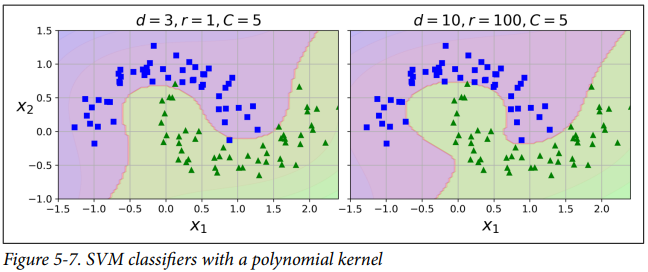

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])

polynomial_svm_clf.fit(X, y)

C:\Users\tasty\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [4]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict([[5.5, 1.7]])

array([1], dtype=int64)

### 5.2.2. RBF Kernel

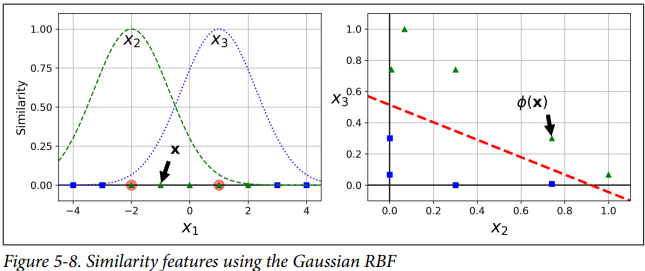

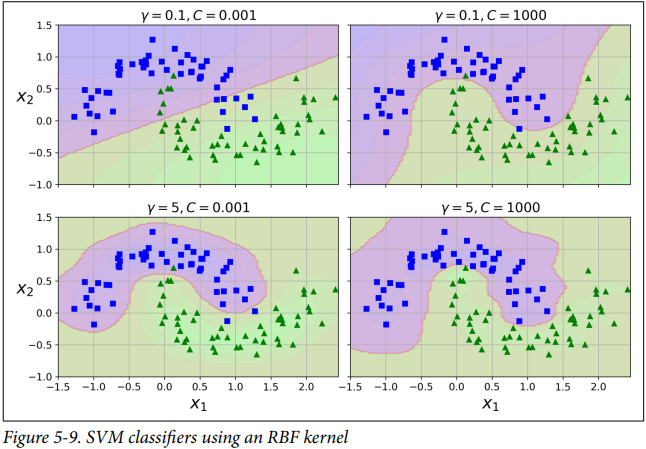

In [5]:
rbf_kernel_svm_clf = Pipeline([
    ('sclaer', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

* gamma가 커질수록 instance간의 거리에 민감하게 반응하기에 경계가 더욱 불규칙해진다. 

### 5.2.3. Big-O

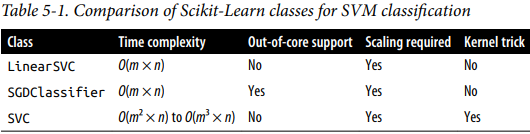

* LinearSVC는 Kernel Trick을 사용하지 않은 Library를 기반으로 만들어졌다. 훈련샘플과 특성수에 Big-O가 선형적으로 늘어난다.

* SVC는 Kernel Trick 기반 Library로 만들어졌다. LinearSVC와 달리 $m{^2}$이기에 훈련샘플수가 커질수록 엄청나게 느려진다. 

## 5.3. SVM Regression

* SVM Regression은 marginal error 내에 가능한 많은 instance가 들어오도록 학습한다.
* 이 때 epsilon은 regression line으로부터의 거리를 뜻한다. 마찬가지로 soft margin 학습을 위한 penalty term이 존재한다.

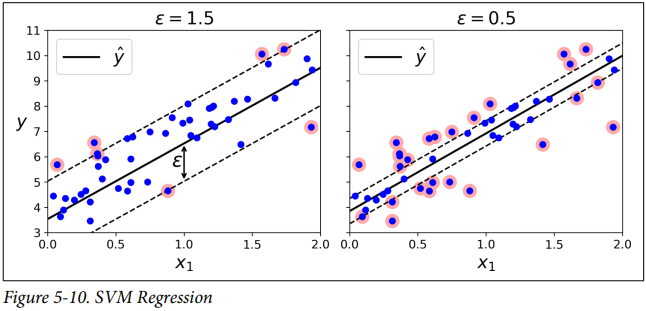

In [6]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

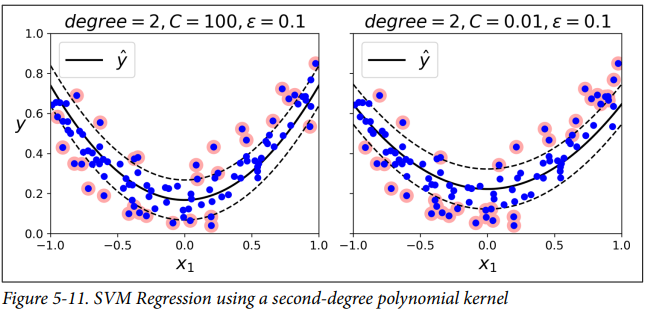

In [7]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

## 5.4. SVM

### 5.4.1. Objective Function

* weight norm이 작을수록 margin은 커진다. margin = $2f(x)/||w||$이기 때문이다.
* Hard margin과 Soft margin SVM간의 차이는 결국 penalty term의 존재 여부에 달려있다.이 때 C값을 높일수록 penalty를 줄이려는 노력이 강해지니 더욱 sample에 overfitting된다.

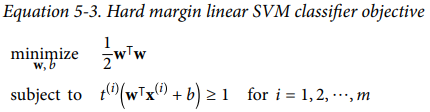

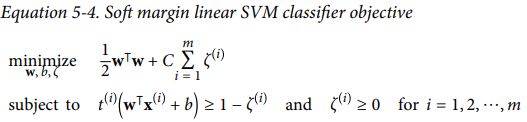

### 5.4.2. QP

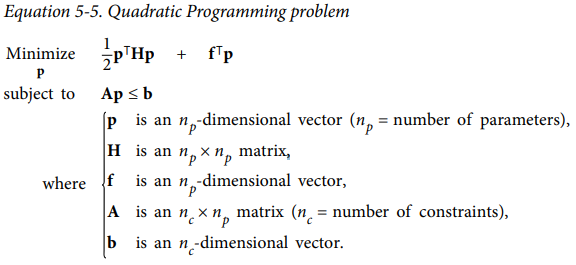

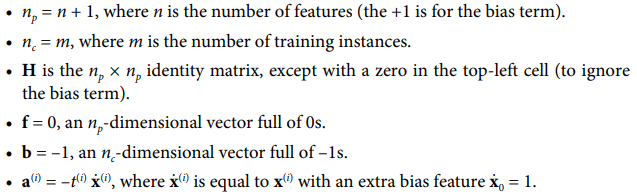

### 5.4.3. Dual Problem

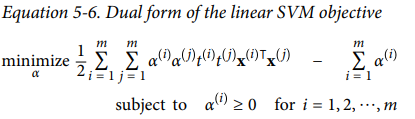

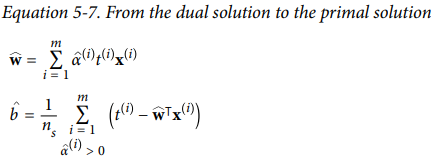

### 5.4.4. Kernel Trick

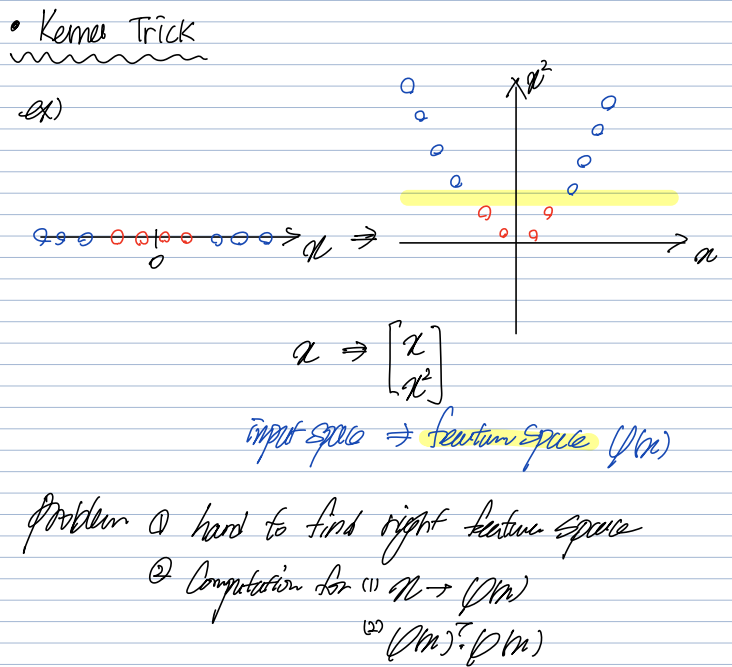

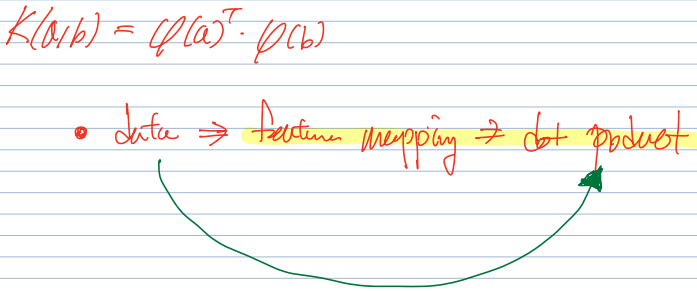

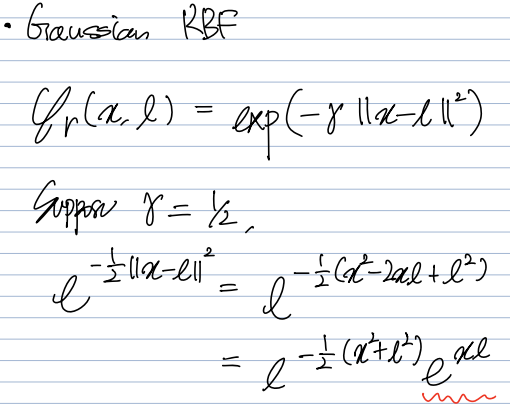

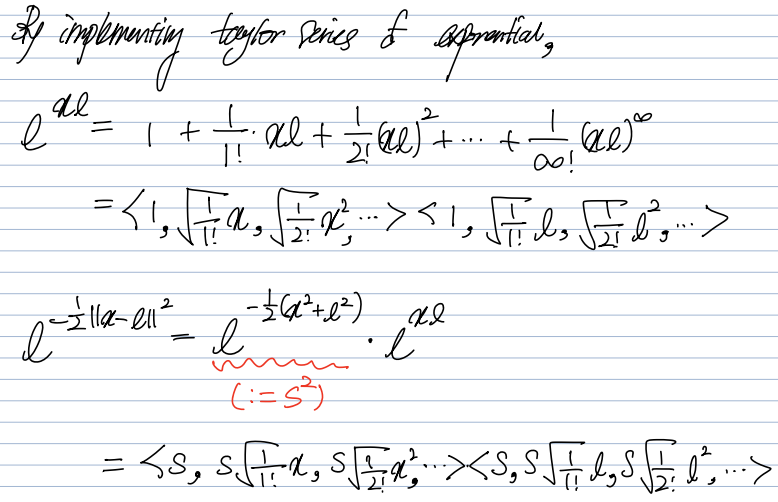

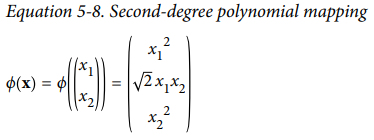

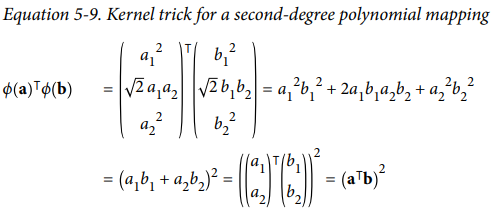

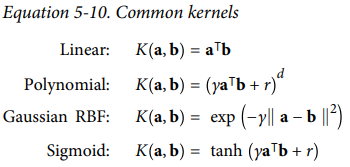

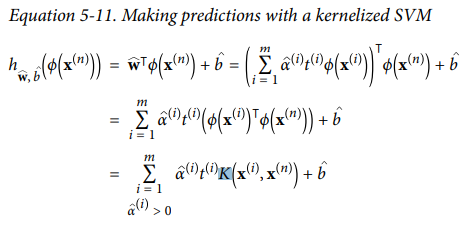

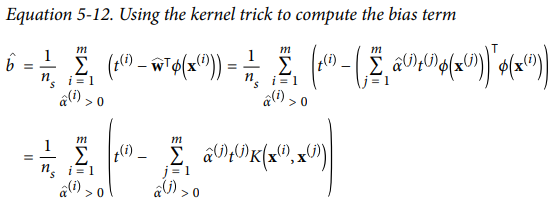

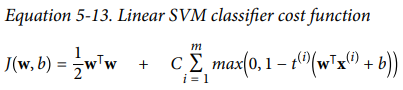

### Problem2.

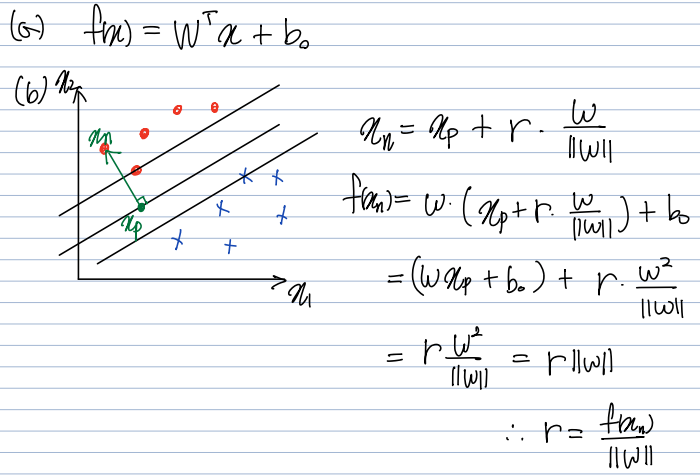

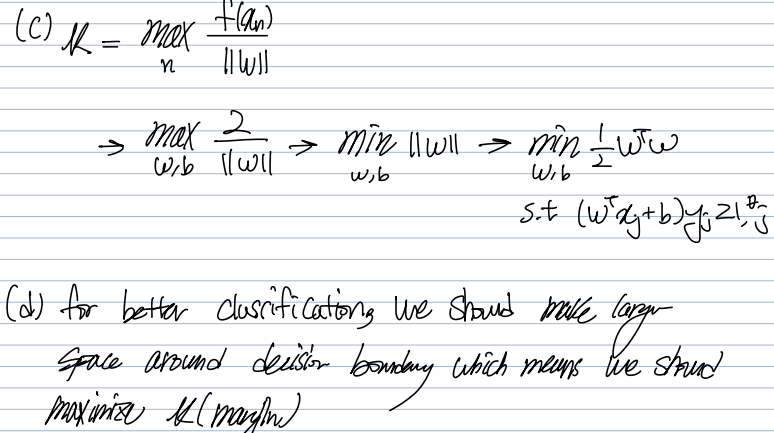

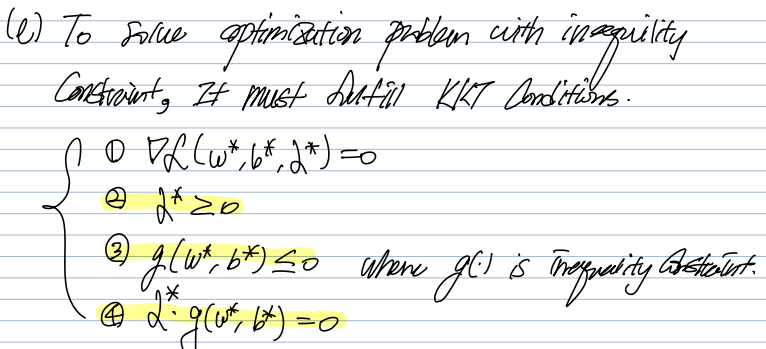

### Problem3.

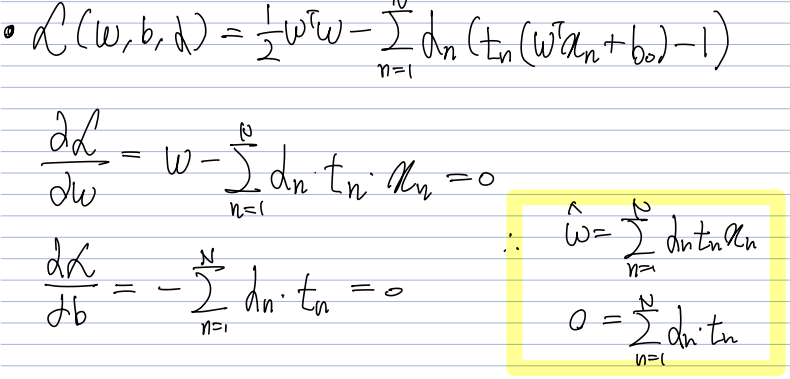

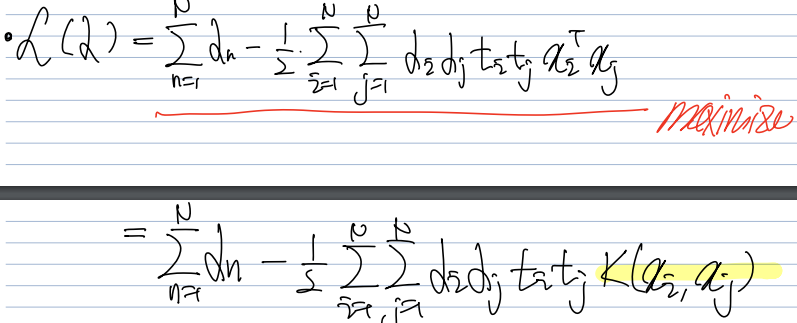

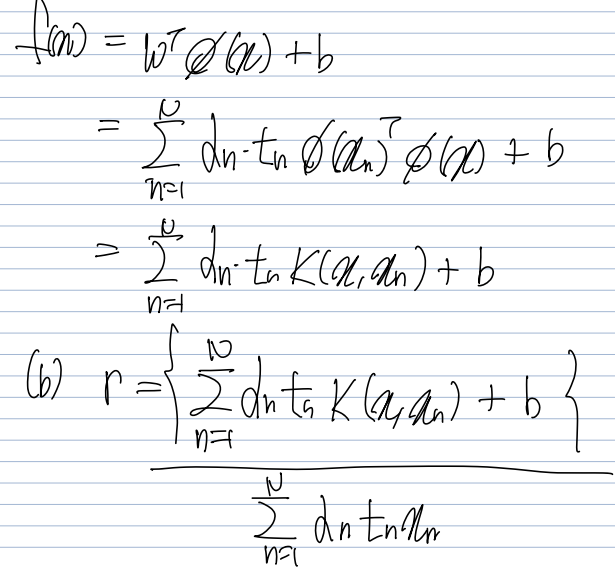